In [28]:
import os
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# data_dir = '/content/CNN_dataset'

# Define the path to the zipped folder in your Drive
zip_path = '/content/drive/MyDrive/Dataset/CNN_dataset.zip'

# Define the path where you want to extract the contents of the zip file
extract_path = '/content/drive/MyDrive/Dataset'

# Unzip the folder using the !unzip command
!unzip '{zip_path}' -d '{extract_path}'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Dataset/CNN_dataset/CXR/009317.jpeg  
  inflating: /content/drive/MyDrive/Dataset/__MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: /content/drive/MyDrive/Dataset/CNN_dataset/CXR/002808.jpeg  
  inflating: /content/drive/MyDrive/Dataset/__MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: /content/drive/MyDrive/Dataset/CNN_dataset/CXR/000835.jpeg  
  inflating: /content/drive/MyDrive/Dataset/__MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: /content/drive/MyDrive/Dataset/CNN_dataset/CXR/001727.jpeg  
  inflating: /content/drive/MyDrive/Dataset/__MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: /content/drive/MyDrive/Dataset/CNN_dataset/CXR/004525.jpeg  
  inflating: /content/drive/MyDrive/Dataset/__MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: /content/drive/MyDrive/Dataset/CNN_dataset/CXR/006518.jpeg  
  inflating: /content/drive/MyDrive/Dataset/__MACOSX/CNN_dataset/CXR/._006518.jp

In [16]:
data_dir = '/content/drive/MyDrive/Dataset/CNN_dataset'

# Get the names of the subdirectories in the data directory
categories = sorted(x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x)))

# Count the number of subdirectories (i.e., categories)
total_categories = len(categories)

# Create a list of image file paths for each category
img_per_category = [sorted(os.listdir(os.path.join(data_dir, categories[i]))) for i in range(total_categories)]

# Count the number of images in each category
img_per_category_count = [len(img_per_category[i]) for i in range(total_categories)]

# Combine all the image file paths into a single list
image_file = [os.path.join(data_dir, categories[i], x) for i in range(total_categories) for x in img_per_category[i]]

# Create a list of image categories, where each element corresponds to the category of the corresponding image file in image_file_list
image_category = [i for i in range(total_categories) for _ in img_per_category[i]]

# Count the total number of images
total_image_count = len(image_file)

# Get the dimensions of the first image in the list (assuming all images have the same dimensions)
dimension = PIL.Image.open(image_file[0]).size

# Print some information about the data
print("Dimension", dimension)
print("Categories", categories)
print("Images per category", img_per_category_count)


Dimension (64, 64)
Categories ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Images per category [10000, 10000, 10000, 10000, 10000]


In [22]:
image_list = []
for image_path in image_file:
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  image_list.append(image)

In [40]:
# convert image_list and image_category to numpy arrays
image_list = np.array(image_list)
image_category = np.array(image_category)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(image_list, image_category, 
                                                    test_size=0.1, 
                                                    stratify=image_category, 
                                                    random_state=42)

# Split train data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.1/(1-0.1), 
                                                  stratify=y_train, 
                                                  random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 64, 64)
y_train shape: (40000,)
x_val shape: (5000, 64, 64)
y_val shape: (5000,)
x_test shape: (5000, 64, 64)
y_test shape: (5000,)


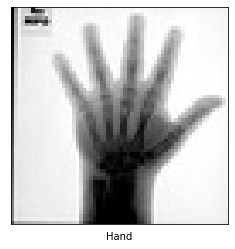

In [34]:
plt.xticks([])
plt.yticks([])
plt.xlabel(categories[y_train[903]])
plt.imshow(x_train[703],cmap=plt.cm.binary)

In [45]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)       

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model_log=model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
280/280 [==============================] - 207s 738ms/step - loss: 0.1491 - accuracy: 0.9463 - val_loss: 0.0289 - val_accuracy: 0.9921
Epoch 2/10
280/280 [==============================] - 207s 740ms/step - loss: 0.0663 - accuracy: 0.9783 - val_loss: 0.0181 - val_accuracy: 0.9948
Epoch 3/10
280/280 [==============================] - 207s 740ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0171 - val_accuracy: 0.9942
Epoch 4/10
280/280 [==============================] - 203s 727ms/step - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.0132 - val_accuracy: 0.9958
Epoch 5/10
280/280 [==============================] - 203s 724ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0104 - val_accuracy: 0.9959
Epoch 6/10
280/280 [==============================] - 202s 722ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0144 - val_accuracy: 0.9976
Epoch 7/10
280/280 [==============================] - 202s 723ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.0081 -

In [49]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9990000128746033


In [50]:
predictions = model.predict(x_test)
predictions[0]

157/157 [==============================] - 9s 54ms/step


array([1.2568386e-04, 8.8816392e-05, 9.9955189e-01, 1.1046122e-05,
       2.2257534e-04, 6.1205380e-10, 2.6282089e-08, 1.8807771e-08,
       1.9698414e-09, 3.3859040e-09], dtype=float32)

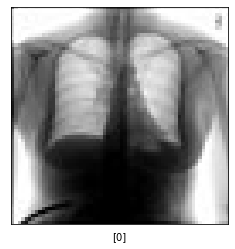

In [54]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[33]])
plt.imshow(x_test[33],cmap=plt.cm.binary)

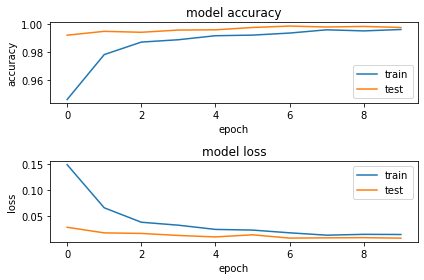

In [52]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()